In [1]:
import time
import random
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

plt.style.use('ggplot')

# Load Data

In [2]:
digits = datasets.load_digits()

# Exploratory Analysis

In [3]:
target_counts = pd.Series(digits.target)
tc_series = target_counts.value_counts()

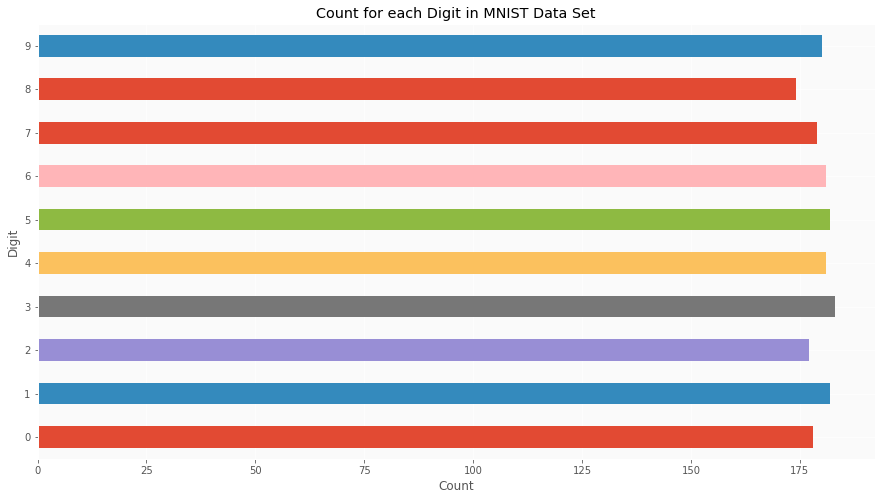

In [4]:
f, ax = plt.subplots(figsize=(15, 8))

ax.set_facecolor('#fafafa')
tc_series.reindex(list(range(0, 10))).plot.barh()
plt.title('Count for each Digit in MNIST Data Set')
plt.xlabel('Count')
plt.ylabel('Digit')
plt.show()

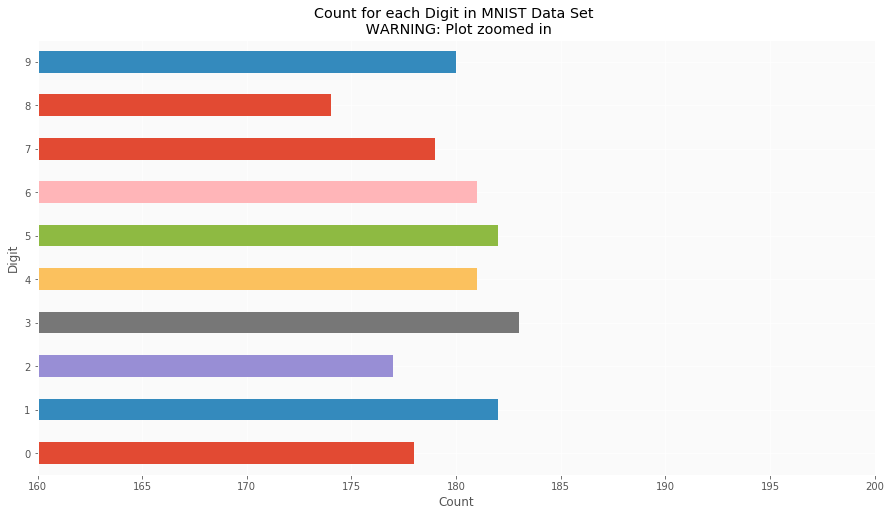

In [5]:
f, ax = plt.subplots(figsize=(15, 8))

ax.set_facecolor('#fafafa')
tc_series.reindex(list(range(0, 10))).plot.barh()
plt.title('Count for each Digit in MNIST Data Set \n WARNING: Plot zoomed in')
plt.xlabel('Count')
plt.ylabel('Digit')
plt.xlim((160, 200))
plt.show()

In [6]:
random.seed(42)
rand_list = []

for x in range(8):
  rand_list.append(random.randint(1,1797))

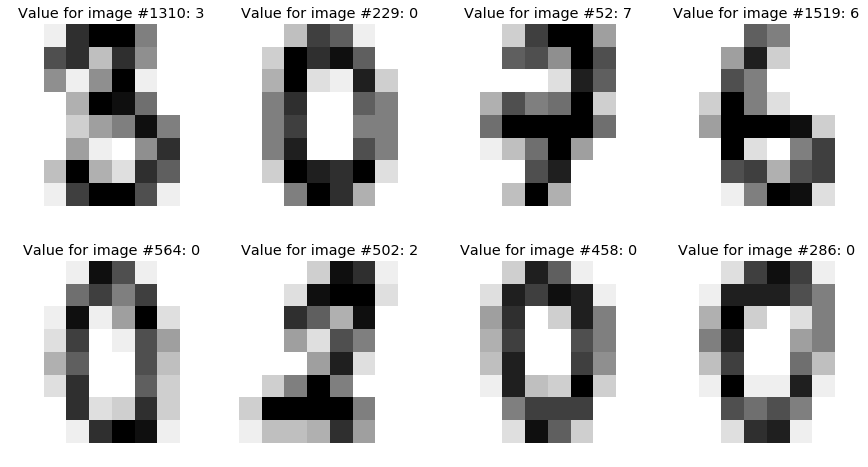

In [7]:
f, ax = plt.subplots(figsize=(15, 8))
for i in range(0, len(rand_list)):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    plt.title('Value for image #{0}: {1}'\
    .format(rand_list[i],
              digits.target[rand_list[i]]))
    
    plt.imshow(digits.images[rand_list[i]], 
               cmap=plt.cm.gray_r,
               interpolation='nearest')

In [8]:
data = digits.images.reshape((len(digits.images), -1))

In [9]:
digits_df = pd.DataFrame(data)

In [10]:
target_counts = target_counts.rename('target')

In [11]:
digits_df = pd.concat([digits_df, target_counts], axis=1)

# Create Training and Test Set

In [12]:
feature_space = digits_df.iloc[:, digits_df.columns != 'target']
feature_class = digits_df.iloc[:, digits_df.columns == 'target']

In [13]:
training_set, test_set, class_set, test_class_set = train_test_split(feature_space, 
                                          feature_class, 
                                          test_size=0.33, 
                                          random_state=42)

In [14]:
class_set = class_set.values.ravel() 
test_class_set = test_class_set.values.ravel()

# Fit Model 

In [15]:
fit = GradientBoostingClassifier(random_state=42,
                                loss = 'deviance',
                                learning_rate = 0.1, 
                                max_depth = 3, 
                                min_samples_split=2, 
                                min_samples_leaf=1)

In [16]:
fit.fit(training_set, class_set)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

# Cross Validation on Training Set

In [17]:
n = KFold(n_splits=10)

scores = cross_val_score(fit, 
                         training_set, 
                         class_set, 
                         cv = n)

In [18]:
print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
              .format(scores.mean(), scores.std() / 2))

Accuracy:  0.956 (+/-  0.012)


# Test Set Metrics

In [19]:
predictions = fit.predict(test_set)

In [20]:
pd.crosstab(index = test_class_set,
            columns = predictions, 
            rownames=['Actual values'],
            colnames=['Predicted Values'])

Predicted Values,0,1,2,3,4,5,6,7,8,9
Actual values,,,,,,,,,,
0,54,0,0,0,1,0,0,0,0,0
1,0,54,0,1,0,0,0,0,0,0
2,0,0,51,0,0,0,0,1,0,0
3,0,1,0,51,0,1,0,0,2,1
4,0,1,0,0,61,0,0,2,0,0
5,0,0,0,0,0,68,1,0,1,3
6,0,0,0,0,0,1,55,0,1,0
7,0,0,0,0,1,0,0,60,0,1
8,0,1,0,0,0,0,0,0,51,0


In [21]:
accuracy = fit.score(test_set, test_class_set)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy))

Here is our mean accuracy on the test set:
 0.958


In [22]:
test_error_rate = 1 - accuracy
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate))

The test error rate for our model is:
  0.0421
